In [44]:
import pandas as pd
import numpy as np
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBRegressor

Load dataset

In [45]:
df = pd.read_csv('data/Boston.csv')
print(df.shape)
print(df.head())

(506, 15)
   Unnamed: 0     crim    zn  indus  chas  ...  tax  ptratio   black  lstat  medv
0           1  0.00632  18.0   2.31     0  ...  296     15.3  396.90   4.98  24.0
1           2  0.02731   0.0   7.07     0  ...  242     17.8  396.90   9.14  21.6
2           3  0.02729   0.0   7.07     0  ...  242     17.8  392.83   4.03  34.7
3           4  0.03237   0.0   2.18     0  ...  222     18.7  394.63   2.94  33.4
4           5  0.06905   0.0   2.18     0  ...  222     18.7  396.90   5.33  36.2

[5 rows x 15 columns]


In [46]:
df.drop(columns=['Unnamed: 0'], axis=1, inplace=True)

Explore dataset

In [47]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [48]:
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

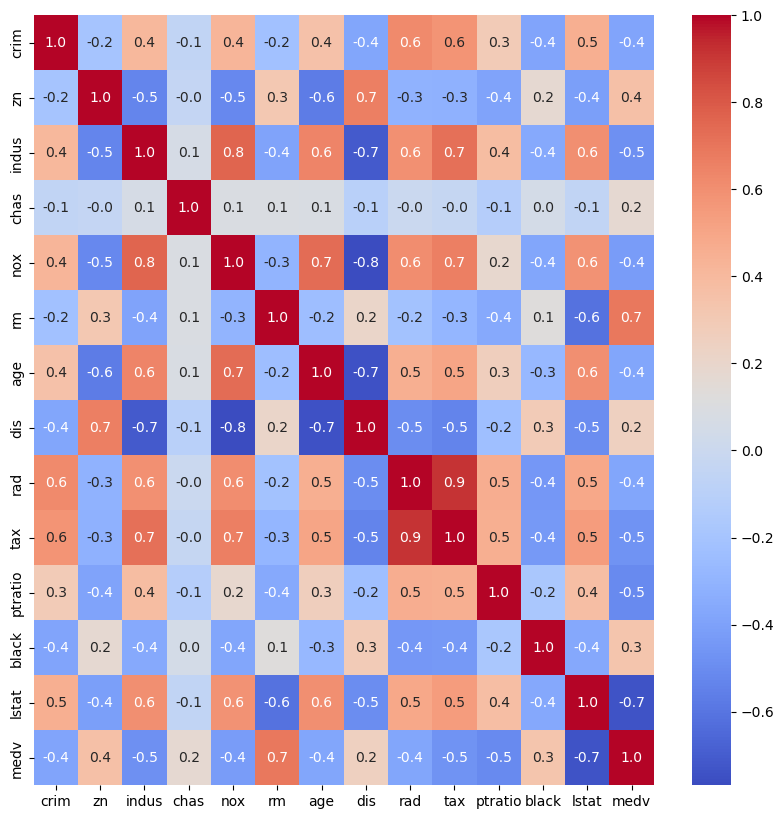

In [49]:
correlation = df.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(correlation, annot=True, fmt='.1f', cmap='coolwarm' )
plt.show()

array([[<Axes: title={'center': 'crim'}>, <Axes: title={'center': 'zn'}>,
        <Axes: title={'center': 'indus'}>,
        <Axes: title={'center': 'chas'}>],
       [<Axes: title={'center': 'nox'}>, <Axes: title={'center': 'rm'}>,
        <Axes: title={'center': 'age'}>, <Axes: title={'center': 'dis'}>],
       [<Axes: title={'center': 'rad'}>, <Axes: title={'center': 'tax'}>,
        <Axes: title={'center': 'ptratio'}>,
        <Axes: title={'center': 'black'}>],
       [<Axes: title={'center': 'lstat'}>,
        <Axes: title={'center': 'medv'}>, <Axes: >, <Axes: >]],
      dtype=object)

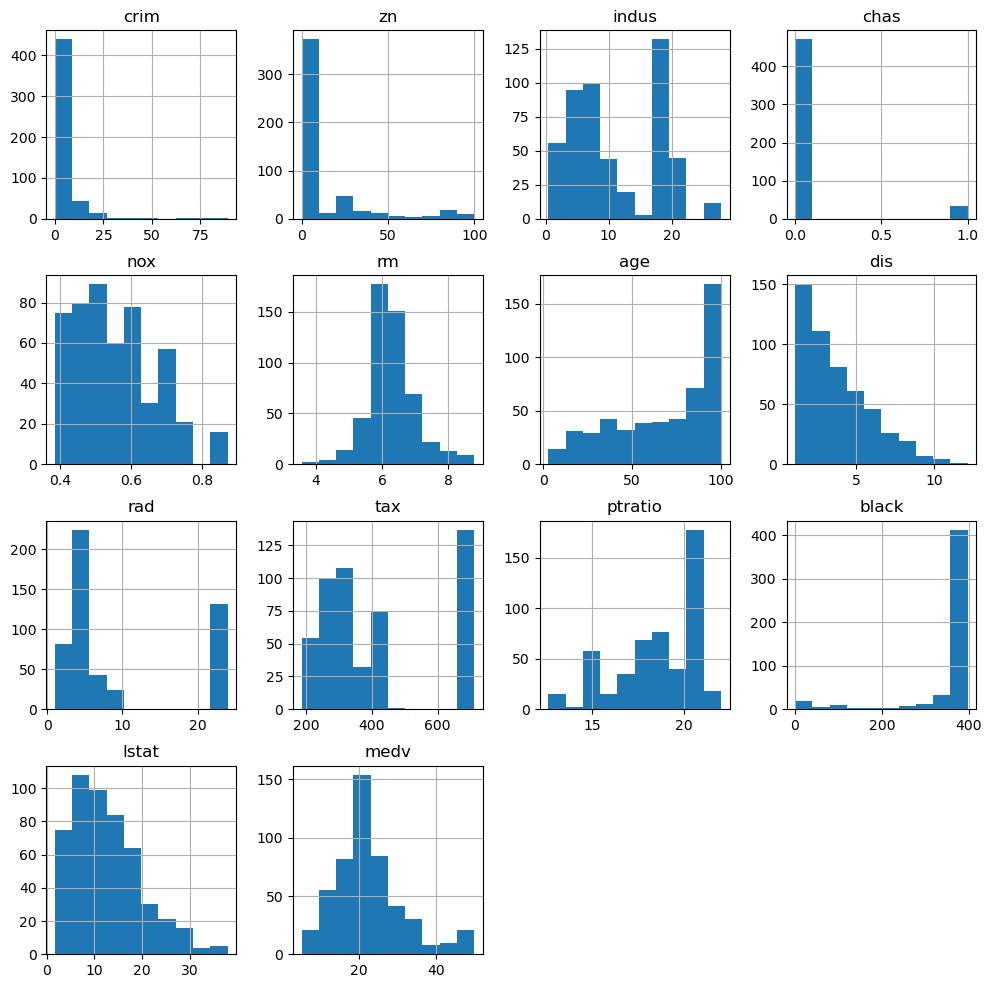

In [50]:
df.shape
df.hist(figsize=(12,12))

In [51]:
#features
X = df.iloc[:,:13]
X.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [52]:
#target value - medv
Y = df.iloc[:, -1]
Y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: medv, dtype: float64

In [53]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=5)

print(X.shape, X_train.shape, X_test.shape)

(506, 13) (404, 13) (102, 13)


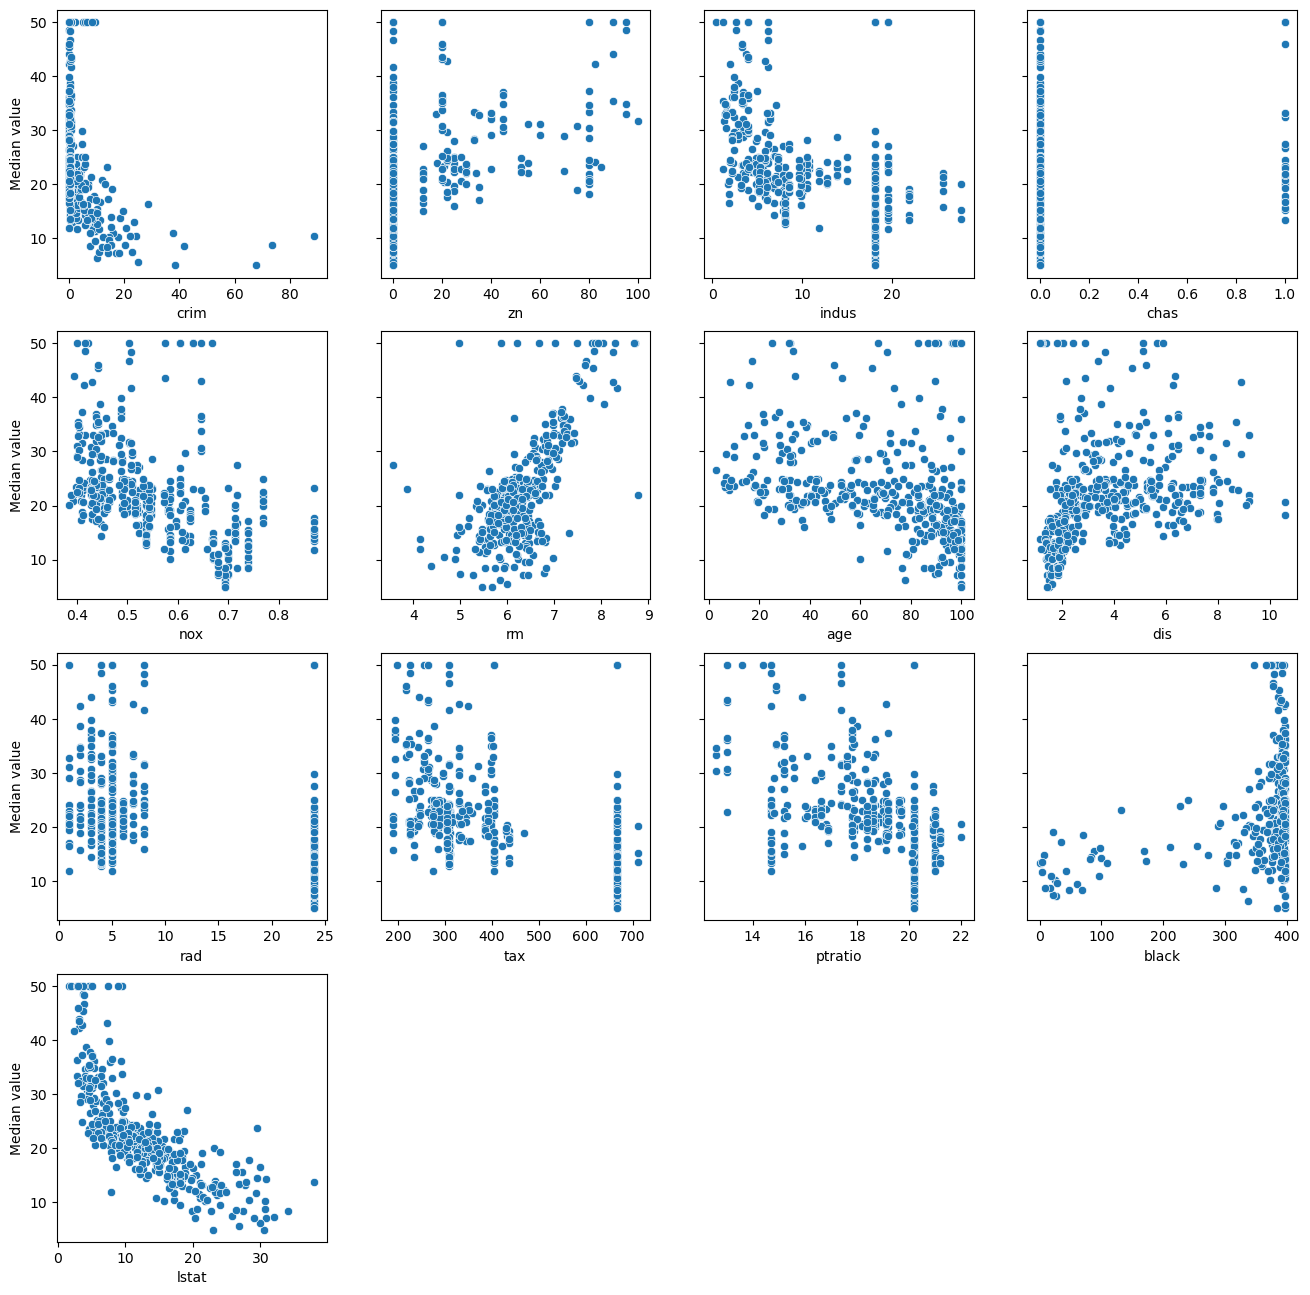

In [54]:
#scatterplots of features and target
features = list(X_train.columns)
fig,ax = plt.subplots(4,4, figsize=(16,16), sharey=True)

for i in range(len(features)):
    if i < len(features):
        row, col = divmod(i, 4)
        sns.scatterplot(x=features[i], y=Y_train, data=df, ax=ax[row, col])
        ax[row, col].set_xlabel(features[i])
        ax[row, col].set_ylabel('Median value')

for j in range(len(features), 4 * 4):  # Adjust for 4x4 grid
    fig.delaxes(ax.flatten()[j])

plt.show()

In [55]:
# model = LinearRegression()
model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model.fit(X_train, Y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [56]:
y_pred = model.predict(X_test)

In [57]:
mae = metrics.mean_absolute_error(Y_test, y_pred)
mse = metrics.mean_squared_error(Y_test, y_pred)
r2 = metrics.r2_score(Y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Absolute Error: 2.04093950028513
Mean Squared Error: 8.672272808155395
R-squared: 0.8892343302014635


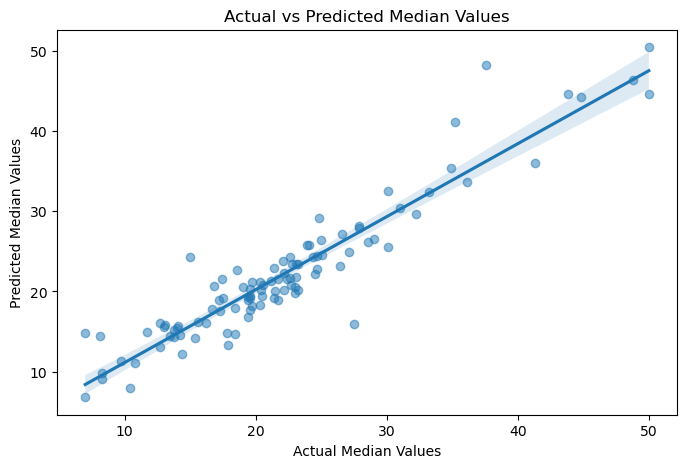

In [58]:

plt.figure(figsize=(8, 5))
sns.regplot(x=Y_test, y=y_pred, scatter_kws={'alpha':0.5})
plt.xlabel("Actual Median Values")
plt.ylabel("Predicted Median Values")
plt.title("Actual vs Predicted Median Values")
plt.show()


